## Collatz sequence lengths of first 10 million integers in Apache Spark

Author: Chi Yan Tang

Take an integer n. If n is even, divide it by two (n <- n/2). If n is odd, multiply this number by 3 and add 1 (n <- 3n+1). The result of this operation is the input of the next iteration. 

For example, if the initial value of n is 3, the Collatz sequence is [3, 10, 5, 16, 8, 4, 2, 1]. The Collatz sequence length is 8.

The unproven Collatz conjecture specifies that any integer n, will return to 1.

Paul Erdos has famously said, "Mathematics may not be ready for such problems." For more information on the Collatz conjecture, see http://mathworld.wolfram.com/CollatzProblem.html

The following code plots a frequency distribution of the Collatz sequence lengths for the first ten million integers. 

The code is written in Apache Spark, an open-source distributed computing framework. pySpark is the Python API for Spark.

In [15]:
#!pip install --upgrade pandas
#!pip install --upgrade google-api-python-client
#!pip install --upgrade seaborn
#!pip install --upgrade pyspark
import pyspark
import random 
import time

from pyspark import SparkContext
#sc = SparkContext()

start_time = time.time()

MAXNUMBER = 10000000

def collatz_length(x):
    length = 1
    while x > 1:
       if x % 2 == 0:
         x = x/2
       else:
         x = 3*x + 1            
       length += 1
    return length

for partitions in [1,2,4]:   #testing code execution time over different partition sizes
    # Collatz sequence length frequencies
    frequenciesRDD = sc.parallelize(range(1,MAXNUMBER), partitions)
    frequencies = frequenciesRDD.map(lambda x:(collatz_length(x),1)) \
                                .reduceByKey(lambda x, y: x + y).collect()

    print("Execution time: %s seconds - %s partition(s)" % (time.time() - start_time,partitions))
    start_time = time.time()

Execution time: 546.4677586555481 seconds - 1 partition(s)
Execution time: 337.4857029914856 seconds - 2 partition(s)
Execution time: 257.45519518852234 seconds - 4 partition(s)


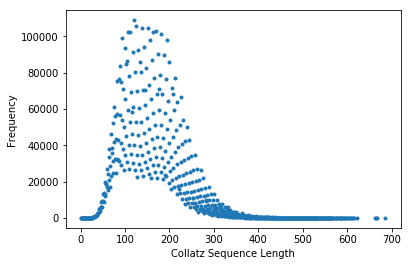

In [16]:
import matplotlib.pyplot as plt
[x,y] = zip(*frequencies)
plt.plot(x, y,'.')
plt.show()
plt.xlabel("Collatz Sequence Length")
plt.ylabel("Frequency")
